In [1]:
# ================================
# Retail Sales Data Analysis
# ================================

# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# 2. Load Dataset
df = pd.read_csv("train.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (9800, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
# 3. Data Cleaning

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert date columns
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True)

# Create new features
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month_name()

# Remove extreme sales outliers (top 1%)
df = df[df["Sales"] < df["Sales"].quantile(0.99)]

print("Cleaned Dataset Shape:", df.shape)


Cleaned Dataset Shape: (9702, 20)


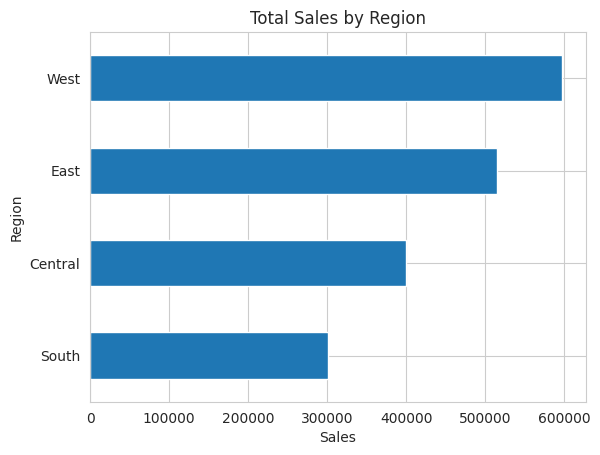

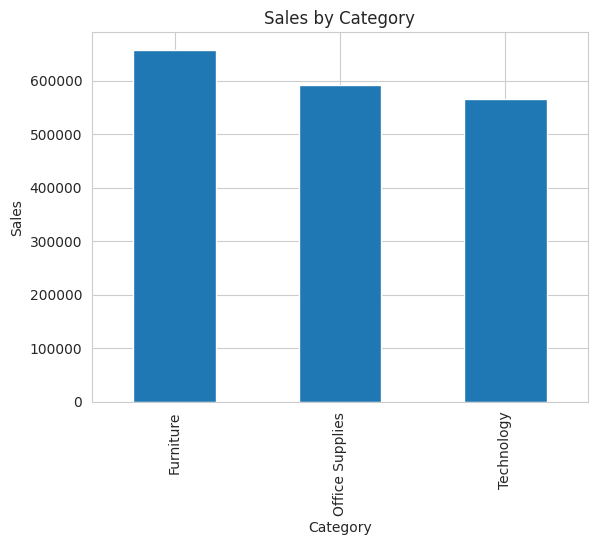

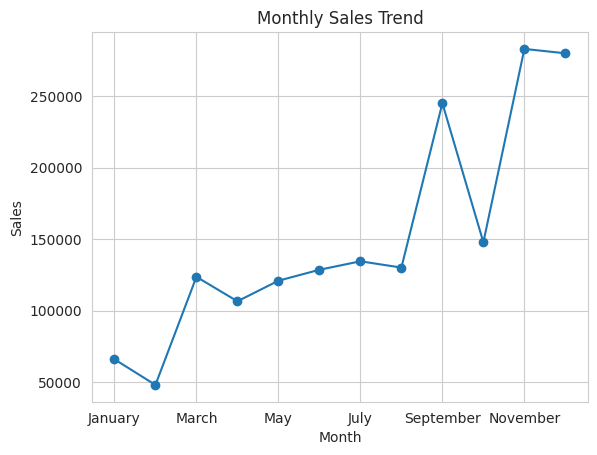

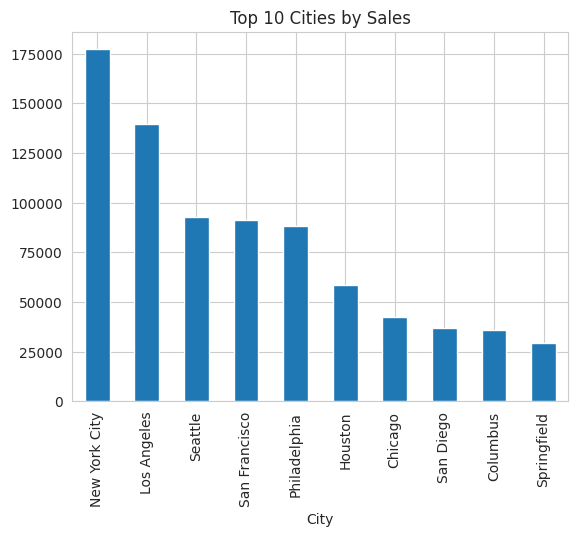

In [3]:
# 4. Sales by Region
region_sales = df.groupby("Region")["Sales"].sum().sort_values()

plt.figure()
region_sales.plot(kind="barh")
plt.title("Total Sales by Region")
plt.xlabel("Sales")
plt.show()


# 5. Sales by Category
plt.figure()
category_sales = df.groupby("Category")["Sales"].sum()
category_sales.plot(kind="bar")
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.show()


# 6. Monthly Sales Trend
plt.figure()
monthly_sales = df.groupby("Month")["Sales"].sum()

monthly_sales = monthly_sales.reindex([
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
])

monthly_sales.plot(marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


# 7. Top 10 Cities by Sales
plt.figure()
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind="bar")
plt.title("Top 10 Cities by Sales")
plt.show()
